# Pytorch Workflow Fundamentals


Here,we are going to cover
1) Getting data ready	Data can be almost anything but to get started we're going to create a simple straight line
2. Building a model	Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.
3. Fitting the model to data (training)	We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
4. Making predictions and evaluating a model (inference)	Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
5. Saving and loading a model	You may want to use your model elsewhere, or come back to it later, here we'll cover that.
6. Putting it all together

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# checking pytorch version
torch.__version__

'2.4.1+cu124'

# 1)  Data (preparing and loading)
Here, we will use linear regression with known parameters.then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [3]:
#Creatinf known parameters(w and b)
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)# adds one dimension to 1st dimension
y = weight * X + bias
# let's see what X and y look like
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Spliting data into training and test sets

In [4]:
train_split = int(0.8* len(X)) # requires and int for slicing
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

Lets try to visualize the relationship between X_train and y_train

In [5]:
# lets create a function to visualize 
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data = X_test,
                    test_label = y_test,predictions = y_preds):
    plt.figure(figsize=(10,7))
    #for training data
    plt.scatter(train_data,train_label, c="black",s=10,label="Training Data")
    #for test data
    plt.scatter(test_data,test_label, c="red",s=10,label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c='blue',s=10,label="Prediction")
    plt.show()
   

NameError: name 'y_preds' is not defined

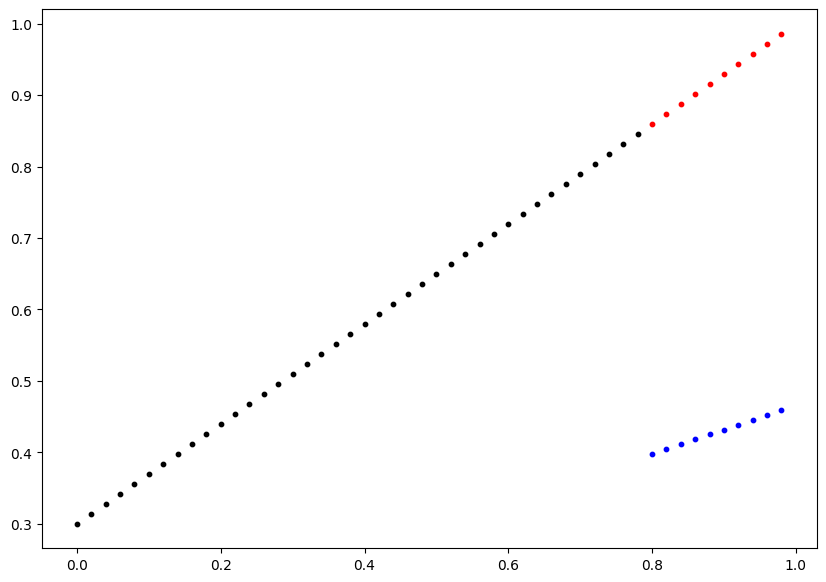

In [ ]:
plot_prediction()

## 2) Build Model
Now, we will be using black dots to predict red dots

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # creates a random tensor for weight to start out with 
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    def forward(self,x: torch.Tensor)-> torch.Tensor:
        return self.weight * x + self.bias

Explantion: Here we have a class LinearRegressionModel which inherits from a base class nn.module(contains building blocks for neural network). we also use a special class nn.Paramters in pytorch that is used to indicate that a particular tensor is learnable.When a tensor is wrapped in nn.Parameter, it is automatically added to the model's parameters. This means that when you call model.parameters() in PyTorch, it will include this parameter in the returned iterable. You can learn about it in it's official documentation

### Checking the contents of Pytorch model


In [ ]:
# set manuail seed as nn.Parameters are randomly initialized
torch.manual_seed(42)

#lets create a instance of the model class
model = LinearRegressionModel()

#check the nn.Parameters 
list(model.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list named parameters
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions through torch.inference_mode()


In [ ]:
# make predictions with model
with torch.inference_mode():
    y_preds = model(X_test)

In [ ]:
# checking the predictions
print(f"NUmber of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values: {y_preds}")

NUmber of testing samples: 10
Number of predictions made: 10
Predicted values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


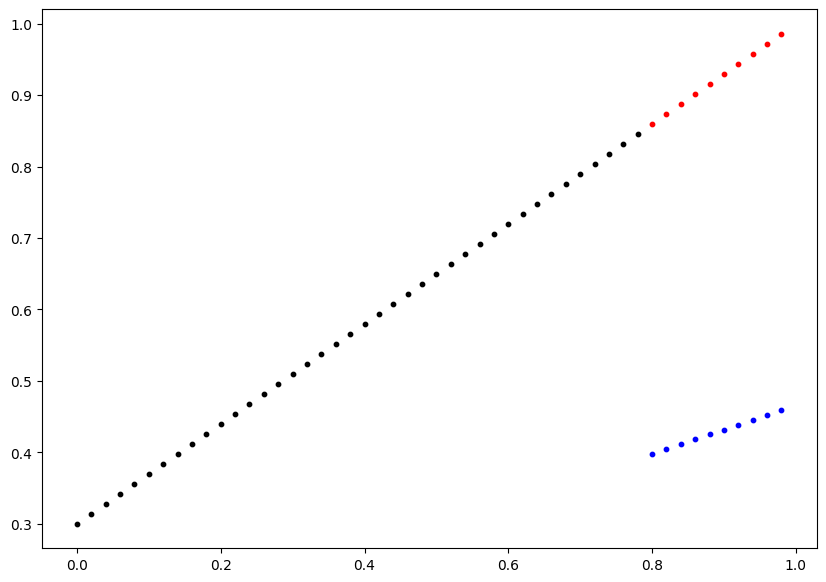

In [ ]:
plot_prediction(predictions=y_preds)

As we can see the prediction is way out. we can further check that by subtracting the original label and predicitons

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

### Train Model
We can now update it's internal parameters , the weights and bias values we set randomly using nn.Parameter() and torch.randn().To properly represent the data we can optimize it's loss fucntion

Loss Function is nothing but a fucntion that measures how off you are with your predictions and our job is to optimize it to have the least error

Let's create a loss function and a optimizer we can help improve our model.We use Mean absolute error and for optimizer we use Stochastic gradient descent

In [ ]:
loss_fn = nn.L1Loss() # MAE loss is same as L1loss

#create an optimizer
optimizer = torch.optim.SGD(params =model.parameters(),lr =0.01)# lr is the learning rate



NameError: name 'model' is not defined

Now lets create a optimization loop in Pytorch
1) Forward pass - The model goes through all of the training data once, performing its forward() function calculations. 

2) Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.

3) Zero Gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.

4) Perform Backpropagation - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards

5) Update the optimizer(Gradient Descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.


In [ ]:
torch.manual_seed(42)

epochs = 100 # how many times the model will updates it's parameters

train_loss_values = [] # empty list to track values
test_loss_values = []
epochs_count = []

for epoch in range(epochs):
    model.train() # this is the default state of model
    m